# ICS 235 Homework Assignment 4
# <span style="color:red">Due: 11:55 PM on Monday, November 18</span>

## Instructions

1. Name your notebook file using your last and first name as presented in Laulima.
    - For example, Harry, Potter ==> HarryPotter_4.ipynb (The number at the end is the assignment number.)
2. Only use .ipynb file extensions. Other extensions (file formats) like .rtf, .zip, .docs, .pdf are not accepted.
3. Data files will be available to the instructor, so no need to upload them to Laulima. Make sure you use the same filenames of data files as given in the homework.
4. Save data files in **"data" folder under your working directory**. Use **relative path** when you read in data in your code.
5. Do not create any subfolders in your Drop Box.
6. **Do not modify or delete the provided code unless instructed to do so.**
7. Clean your code before submission.
    - If needed, provide clear documentation describing the purpose and how to use every class or function in your code.
    - Your submission should **show only the required outputs**. 
8. Run your code before submission to **show all outputs in the submitted file**. 
10. Write your full name in the cell below.
***

## Your Name: Anne Dominique Malig
***

# Exercise 1: Clustering  (60 points)

## About the data

In this exercise, we will work with a gene expression dataset from the Cancer Genome Atlas (TCGA) Research Network. Data was downloaded from the [UCI website](https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq).

Tumor samples were collected from patients with different types of cancer (breast, lung, kidney, ...) and the cells present in the tissues were sequenced. After some data processing, the sequencing data can be expressed in the form of a table, where the rows are our samples and the columns correspond to the number of times RNA from a given gene was detected (in other words, each column correspond to the expression level of a gene).

We want to answer two questions:

    - Can we distinguish between different cancer types by looking at the gene expression level of a tissue?
    - Can we identify the different types of samples if we don't know how many types of cancer we have in the dataset?
    
This problem has actually a direct application in the field of single-cell RNA sequencing. When collecting blood samples from cancer patients, we often have a mix of tumor cells and other cells (e.g. immune cells). Thus, if we want to study the differences between healthy and tumor cells, it is important to sort through those.

## Loading the data

Note: Due to the size limit of 100MB per upload to Laulima, "tcga.csv" file was zipped to "tcga.zip". You should unzip the file before proceeding.

In [12]:
import pandas as pd

df = pd.read_csv("data/tcga.csv", index_col=0, low_memory=False)
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


1. Because this dataset contains 20,531 features, we cannot visualize it directly with matplotlib. 
    1. Compute the PCA transform of this dataset with 2 principal components. (3 points)
    2. How much variance (in percentage) do the first 2 components explain? (3 points)
    3. Do a scatter plot of the transformed data. (2 points)

Explained Variance Ratio: [0.1583855 0.1050396]


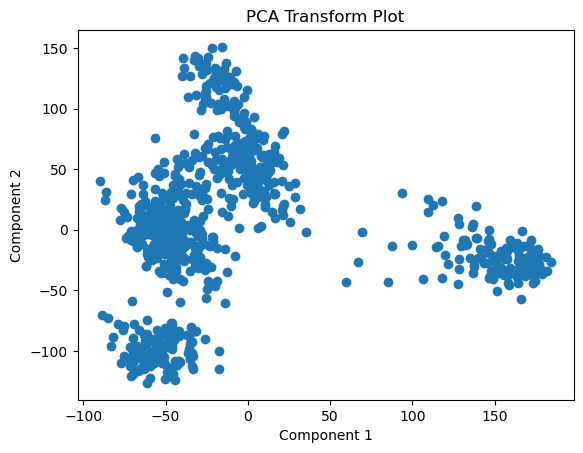

In [13]:
# YOUR CODE

## 1.A

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_scaled = pca.fit_transform(df)

## 1.B

print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')

## 1.C

import matplotlib.pyplot as plt

pca_df = pd.DataFrame(data = pca_scaled, columns = ['C1', 'C2'])

plt.scatter(pca_df['C1'], pca_df['C2'])
plt.title('PCA Transform Plot')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

2. What are the pros and cons of clustering the points in the PCA space rather than the original space? Give one reason for each. (6 points)

> **YOUR ANSWER**<br>
> Pros: Working on a simplified version of the data that is harder to detect in a higher-dimensional space
>
> 
> Cons: Can discard important parts of the data so it is possible that significant information will be left out for analysis


3. 1. Cluster the points in the PCA space using the K-means clustering algorithm. Choose the value for K that you believe is the best based on the plot of the data from Question 1.C. (5 points)
   2. Re-do the scatter plot from Question 1.C and color the points according to the assigned clusters. (3 points)

c:\Users\anne0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


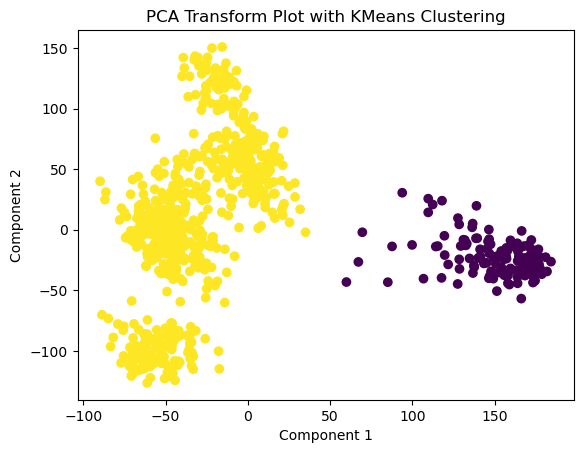

In [14]:
# YOUR CODE (3.A and 3.B)

## 2.A

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
pca_kmeans = kmeans.fit_predict(pca_scaled)

## 2.B

import matplotlib.pyplot as plt

pca_df = pd.DataFrame(data = pca_scaled, columns = ['C1', 'C2'])
pca_df['Cluster'] = pca_kmeans

plt.scatter(pca_df['C1'], pca_df['C2'], c = pca_df['Cluster'], cmap = 'viridis')
plt.title('PCA Transform Plot with KMeans Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

4. 1. We want to find the best K for this clustering problem by looking at the inertia. Plot the inertia as a function of K for K from 2 to 10 (step = 1). (8 points)
   2. What would be the ideal number of clusters? Explain. (6 points)

c:\Users\anne0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\anne0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\anne0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\anne0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

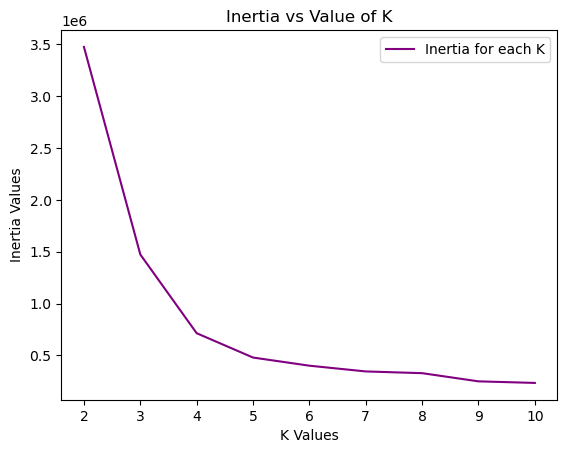

In [15]:
# YOUR CODE (4.A)

import numpy as np
import matplotlib.pyplot as plt

k_range = np.arange(2, 11, 1)
inertia_arr = []

for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(pca_scaled)
    inertia_arr.append(kmeans.inertia_)

plt.plot(k_range, inertia_arr, color = 'purple', label = 'Inertia for each K')
plt.title("Inertia vs Value of K")
plt.xlabel("K Values")
plt.ylabel("Inertia Values")
plt.legend()
plt.show()

>**YOUR ANSWER (4.B)**: The ideal number of clusters is 3 or 4 bbecause this is the elbow of the Inertia vs Values of K graph, it is the point at which the graph starts to flatten out, after a sharp drop. Beyond this point, adding more clusters doesn't improve the compactness of the clusters.
>

5. One advantage of DBSCAN is that it does not require a number of clusters. Instead, it uses other hyperparameters that will indirectly control for it. 
    1. Describe the two main hyperparameters of DBSCAN and their impact on clustering. (7 points)
    2. Cluster the points (in the PCA space) with DBSCAN, and select the values for the two main hyperparameters that will provide between 3 and 6 clusters. (6 points)
       - Note that outliers are not considered part of any cluster, including a cluster of their own. Instead, they are classified as noise points.
    4. Re-do the scatter plot from Question 1.C and color the points using the DBSCAN clusters. (2 points)

> **YOUR ANSWER (5.A)**: The two main hyperparameters of DBSCAN are eps and min_samples. Eps (epsilon) is the maximum distance for two points to be labeled neighbors. The smaller the eps, a greater number of small clusters are created. Min_samples is the minimum number of points needed to create a cluster. A core point has the least min_samples points within eps, while an outlier has fewer than min_samples points in its neighborhood.
> 

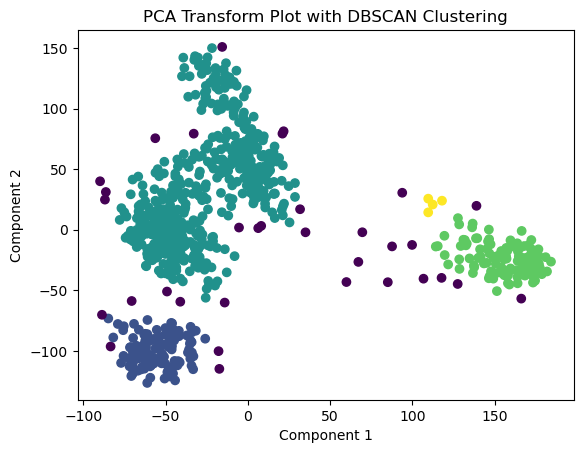

Number of Clusters: 4


In [16]:
# YOUR CODE (5.B and 5.C)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 10, min_samples = 4)
dbscan_labels = dbscan.fit_predict(pca_scaled)

import matplotlib.pyplot as plt

dbscan_df = pd.DataFrame(data = pca_scaled, columns = ['C1', 'C2'])
dbscan_df['Cluster'] = dbscan_labels

plt.scatter(dbscan_df['C1'], dbscan_df['C2'], c = dbscan_df['Cluster'], cmap = 'viridis')
plt.title('PCA Transform Plot with DBSCAN Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Number of Clusters: {num_clusters}')

We found the true labels for this dataset. Let's first load them into the "true_labels" variable.

In [17]:
true_labels = pd.read_csv("data/tcga_labels.csv", index_col=0).Class

6. We want to compare the clustering results from K-means with the best K and for the true labels. 
    1. Redo the plot from Question 1.C and color the points with the true labels. Add a legend with the true class labels. (3 points)
    2. How can you evaluate the effectiveness of K-means clustering to retrieve the true labels? Review the scikit-learn's `metrics` module for measuring the similarity between two clusterings (the predicted and true clusterings), and briefly explain the approach. (There are multiple possible answers.) (6 points)

C:\Users\anne0\AppData\Local\Temp\ipykernel_22180\355175605.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


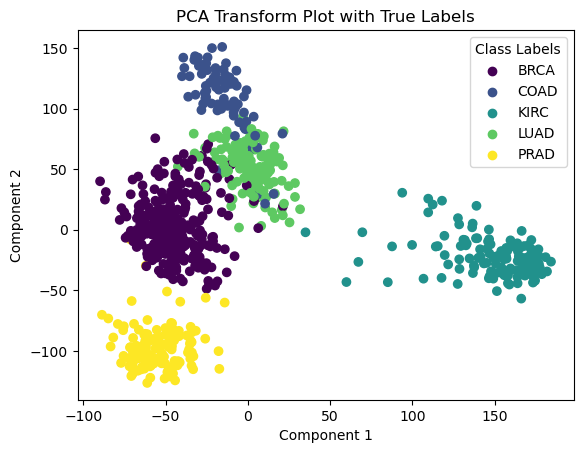

In [18]:
# YOUR CODE (6.A)

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
true_labels_numeric = label_encoder.fit_transform(true_labels)

true_df = pd.DataFrame(data = pca_scaled, columns = ['C1', 'C2'])
true_df['Cluster'] = true_labels_numeric

plt.scatter(true_df['C1'], true_df['C2'], c = true_df['Cluster'], cmap = 'viridis')
plt.title('PCA Transform Plot with True Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

import matplotlib.cm as cm
import matplotlib.colors as mcolors

cmap = cm.get_cmap('viridis')
norm = mcolors.Normalize(vmin=true_df['Cluster'].min(), vmax=true_df['Cluster'].max())

labels = []
for i, label in enumerate(label_encoder.classes_):
    color = cmap(norm(i))
    labels.append(plt.scatter([], [], color=color, label=label))
plt.legend(title="Class Labels", handles=labels)
 
plt.show()

> **YOUR ANSWER (6.B)**: One way to evaluate the effectiveness of K-means clustering to retrieve true labels is by using the Fowlkes-Mallows Index. It measures the smiliarities between the predicted K-means clusters and the true clusters by calculating the geometric mean of precision and recall. The higher the Fowlkes-Mallows Index, the better the performance.
> 

# Exercise 2: Lossy image compression using PCA  (40 points)

In this exercise, we will use Principal Component Analysis (PCA) to compress an image. Contrary to the example with MNIST dataset we saw in class, we have a single picture to compress. It means that we have a single sample, and n_pixels features. This is a problem if we want to efficiently represent our data with PCA. Our approach will therefore consider our image as a samples by features matrix, where each row of the image is a sample and the columns are features. Note that we could have chosen equivalently to do the contrary (samples as columns and features as rows).

In this assignment, we will refer to the "original space" the space of image, and the "PCA space" the space of image after PCA decomposition. The approach we are taking is to represent our image in the PCA space with a limited number of components. We want to select the smallest number of components that will preserve the image quality.

## Loading the data

We first need to load the image. One of the most common Python packages to process image is called PIL (Python Imaging Library). You don't need to learn how to use it, we will simply use it at the very beginning to convert our image into a numpy array.

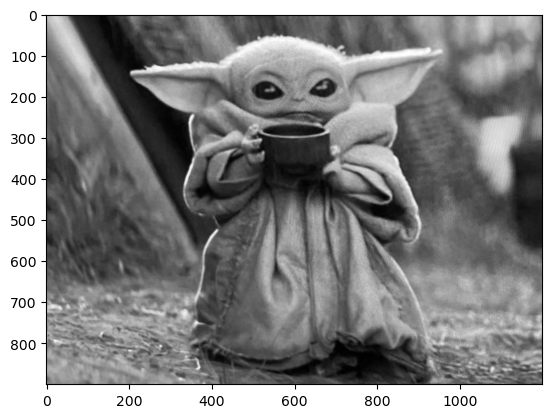

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("data/baby_yoda.jpeg", "r") # load the image
img = img.convert("L") # convert to grayscale

img_npy = np.array(img)

plt.imshow(img_npy, aspect="auto", cmap="gray")

1. 1. Run a Principal Components Analysis on the image with 50 components. (You don't need to scale the data.) (5 points)
   2. Display the explained variance in a plot, where the x-axis is the component ID and the y-axis is the **cumulative explained variance ratio** for the component. (5 points)
   3. How many components do you need to explain 90% of the data variance? 
   (For this question, you will need to write code to find the exact number, not manually by looking at the plot.) (5 points)

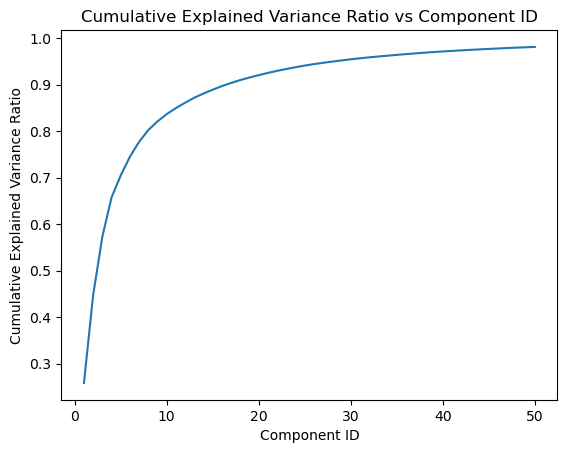

Number of components needed to explain 90% of the data variance: 17


In [20]:
# YOUR CODE

## 1.A

from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
img_reduced = pca.fit_transform(img_npy)

## 1.B

import matplotlib.pyplot as plt
import numpy as np

component_ids = np.arange(1, 51, 1)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(component_ids, cumsum)
plt.title('Cumulative Explained Variance Ratio vs Component ID')
plt.xlabel('Component ID')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

## 1.C

n_components = np.argmax(cumsum >= 0.90) + 1
print(f'Number of components needed to explain 90% of the data variance: {n_components}')

2. 1. Compute the compressed image (i.e., its PCA representation) using the PCA fitted in Question 1.A. (3 points)
   2. How much did we compress the image? Compute the ratio of the size of the compressed image relative to that of the original image. (2 points)
   3. Show the inverse transform of the compressed image. (5 points)

Size Ratio of Compressed Image to Original Image: 0.041666666666666664


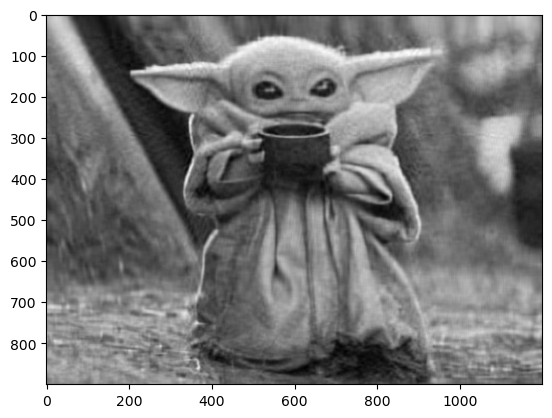

In [21]:
# YOUR CODE

## 2.A

from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
img_reduced = pca.fit_transform(img_npy)
img_recovered = pca.inverse_transform(img_reduced)

## 2.B

comp_og_ratio = img_reduced.size/img_recovered.size
print(f'Size Ratio of Compressed Image to Original Image: {comp_og_ratio}')

## 2.C

import matplotlib.pyplot as plt

plt.imshow(img_recovered, aspect = 'auto', cmap = "gray")

3. We want to visually inspect the compressed images to fine-tune the number of components. Evaluate the impact of the number of components on image quality by plotting in a single plot the original image and the results of compression for a varying number of components from 5 to 40 with a step of 5. Make 3 x 3 subplots to show the nine images. (15 points)
    - Each subplot should represent an image reconstructed from the compressed one for a given number of components. 
    - Place the original image in the first subplot.
    - Set the title of each subplot indicating the number of components used as well as the compression ratio as you computed in Question 2.B above.

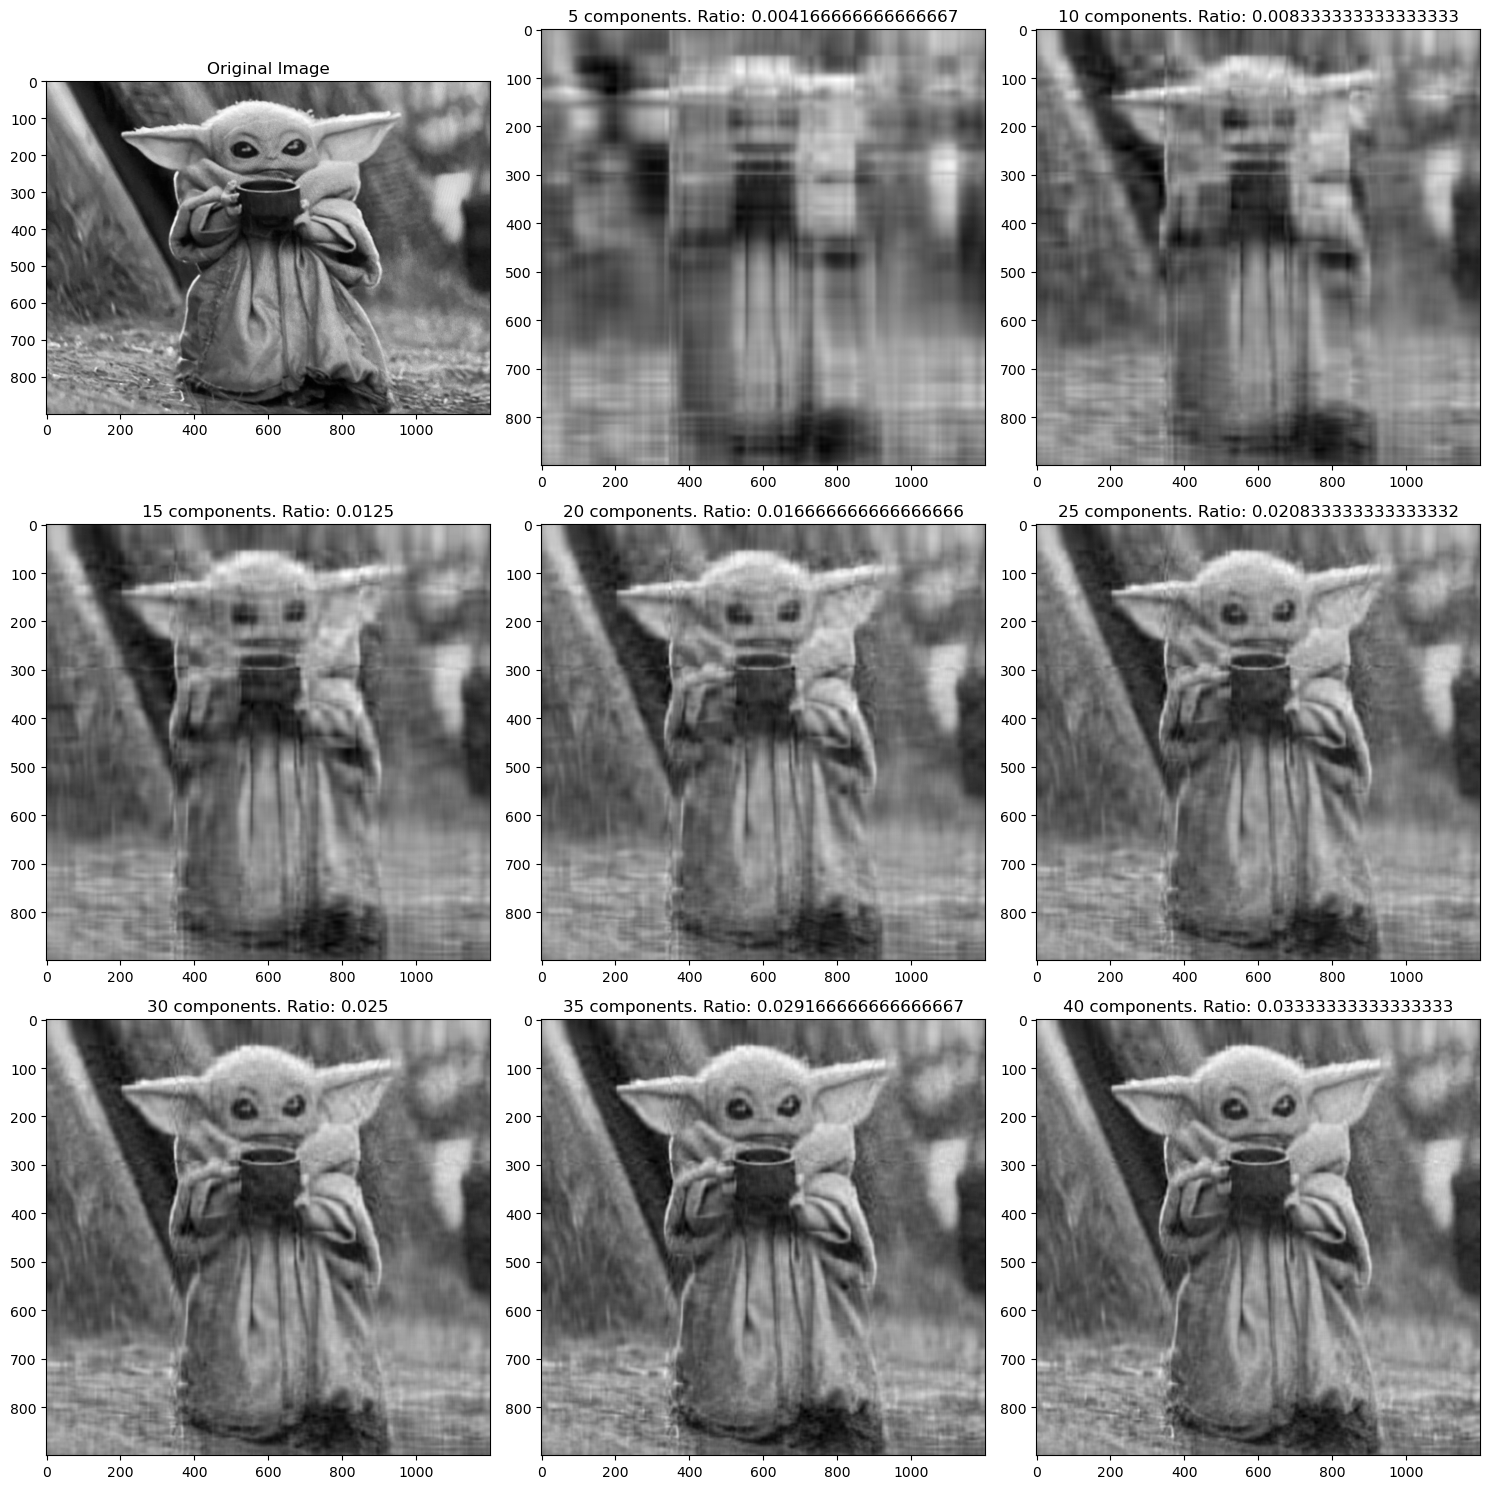

In [22]:
# YOUR CODE

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

fig, axes = plt.subplots(3, 3, figsize = (15, 15))

axes[0, 0].imshow(img_npy, cmap = 'gray')
axes[0, 0].set_title("Original Image")

num_comps = np.arange(5, 45, 5)

for i, num in enumerate(num_comps):
    row = (i + 1) // 3
    col = (i + 1) % 3
    
    pca = PCA(n_components = num)
    img_reduced = pca.fit_transform(img_npy)
    img_recovered = pca.inverse_transform(img_reduced)
    comp_og_ratio = img_reduced.size/img_recovered.size
    
    axes[row, col].imshow(img_recovered, aspect = 'auto', cmap = 'gray')
    axes[row, col].set_title(f'{num} components. Ratio: {comp_og_ratio}')

plt.tight_layout()
plt.show()